In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

D:\Documents\SelfProject\SpeechCommand\lc-fun-technical


In [3]:
%matplotlib inline

In [7]:
from lc_fun_technical.data import SubsetSC, SpeechCommandsDataset

In [15]:
data = SpeechCommandsDataset("data/raw/SpeechCommands/speech_commands_v0.02/", "training")

In [17]:
data[3]

('data\\raw\\SpeechCommands\\speech_commands_v0.02\\backward\\017c4098_nohash_2.wav',
 11)

In [35]:
from lc_fun_technical.transforms import AudioLoader, Compose, WavToMelSpectogram

In [21]:
from functools import partial

In [22]:
import librosa

In [36]:
sr = 16000

In [40]:
cps = Compose([AudioLoader(sample_rate=sr), WavToMelSpectogram(sample_rate=sr)])

In [57]:
data_training = SpeechCommandsDataset("data/raw/SpeechCommands/speech_commands_v0.02/", "testing", cps)

In [60]:
import torch

In [63]:
torch.Tensor(data_training[40][0]).dtype

torch.float32

In [42]:
cps('data\\raw\\SpeechCommands\\speech_commands_v0.02\\backward\\017c4098_nohash_2.wav')

array([[3.3295371e-06, 7.3272406e-07, 4.8830651e-07, ..., 1.0862891e-05,
        1.1440807e-05, 1.1791345e-06],
       [8.1778953e-06, 1.7996920e-06, 1.1993619e-06, ..., 2.6681062e-05,
        2.8100520e-05, 2.8961499e-06],
       [1.7309940e-05, 1.3300426e-05, 7.0500773e-06, ..., 1.7202972e-04,
        1.5733871e-04, 2.0558820e-05],
       ...,
       [3.4599225e-08, 5.2421214e-08, 3.5424872e-08, ..., 1.0064721e-08,
        3.7697504e-08, 1.3746209e-08],
       [1.9001897e-08, 9.2300994e-09, 6.7355195e-08, ..., 2.0579064e-08,
        1.6938456e-08, 6.7311734e-09],
       [1.3485654e-09, 1.1458832e-09, 1.1982781e-08, ..., 2.1309043e-08,
        7.0034392e-09, 4.4199919e-09]], dtype=float32)

In [24]:
wav = AudioLoader()('data\\raw\\SpeechCommands\\speech_commands_v0.02\\backward\\017c4098_nohash_2.wav')

In [50]:
mel_spec = librosa.feature.melspectrogram(y=wav, sr=16000, n_fft=400, hop_length=200, n_mels=128)

In [51]:
import librosa.display

In [52]:
import numpy as np

In [53]:
mel_spec.shape

(128, 81)

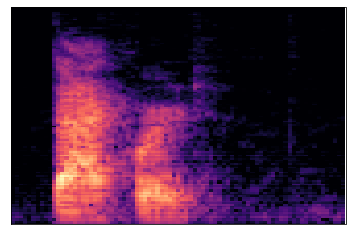

In [55]:
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max))

In [16]:
data.label_to_idx

{'down': 0,
 'go': 1,
 'left': 2,
 'no': 3,
 'off': 4,
 'on': 5,
 'right': 6,
 'stop': 7,
 'up': 8,
 'yes': 9,
 '_silence_': 10,
 '_unknown_': 11,
 'backward': 11,
 'bed': 11,
 'bird': 11,
 'cat': 11,
 'dog': 11,
 'eight': 11,
 'five': 11,
 'follow': 11,
 'forward': 11,
 'four': 11,
 'happy': 11,
 'house': 11,
 'learn': 11,
 'marvin': 11,
 'nine': 11,
 'one': 11,
 'seven': 11,
 'sheila': 11,
 'six': 11,
 'three': 11,
 'tree': 11,
 'two': 11,
 'visual': 11,
 'wow': 11,
 'zero': 11}

In [11]:
test_set = SubsetSC(root="data/raw/", download=True, subset="testing", output_type="mel")

C:\Users\62852\miniconda3\envs\lc_speech\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [13]:
test_set[0][0].shape

torch.Size([1, 128, 81])

# Dataloader

In [64]:
sr = 16000

In [66]:
from functools import partial

In [79]:
def unsqueezer(x):
    return x.unsqueeze(0)

In [67]:
cps = Compose([AudioLoader(sample_rate=sr), WavToMelSpectogram(sample_rate=sr), torch.Tensor])

In [68]:
test_data = SpeechCommandsDataset("data/raw/SpeechCommands/speech_commands_v0.02/", "testing", cps)

In [71]:
from torch.utils.data import DataLoader

In [72]:
dl = DataLoader(test_data, 2, shuffle=True)

In [73]:
batch = next(iter(dl))

In [78]:
batch[0].shape

torch.Size([2, 128, 81])

tensor([ 9, 11])